# Example (LeNet - MNIST - CPU)

In [1]:
import numpy as np
import pandas as pd
#from   keras.models import Sequential
from   keras.models import load_model
#from   keras.layers.core import Dense, Activation, Flatten
#from   keras.layers.convolutional import Conv2D, MaxPooling2D
#from   keras.optimizers import Adam
#from   keras.callbacks import EarlyStopping
#from   time import time
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_to_data = '/work/MA490_DeepLearning/Data'

label_names = list('0123456789')

def PlotImages(ix_start,num_img,rows,cols,X,P,label_names,color=False):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images_errors[ix_start+i])
        else:
            plt.imshow(X[ix_start+i].squeeze(),cmap='Greys_r')
        plt.title(label_names[P[ix_start+i].argmax()])

In [3]:
# load testing MNIST data
MNIST = np.load(path_to_data + '/MNIST/MNIST_test_10000.npz')
images = MNIST['test_images']
labels = MNIST['test_labels']
print(images.shape)
print(labels.shape)

(10000, 28, 28)
(10000,)


In [4]:
# define testing features and target
X = np.expand_dims(images,-1)
P = pd.get_dummies(
    pd.DataFrame(labels,columns=['digits'],dtype='category')).values
print('X shape',X.shape)
print('P shape',P.shape)

X shape (10000, 28, 28, 1)
P shape (10000, 10)


In [5]:
# load model and results
model = load_model('./LeNet-MNIST-GPU.h5')
results = pd.read_csv('./LeNet-MNIST-GPU.csv')
results.head(3)

,epoch,training loss,validation loss,training acc,validation acc
0,1,0.750119,0.499743,0.787250,0.963003
1,2,0.180711,0.359867,0.946875,0.982281
2,3,0.105313,0.307112,0.969094,0.986788


cross-entropy
        training = 0.006498175498563796
      validation = 0.21806327494701971
accuracy rate
        training = 0.9982812572270632
      validation = 0.993919010605176


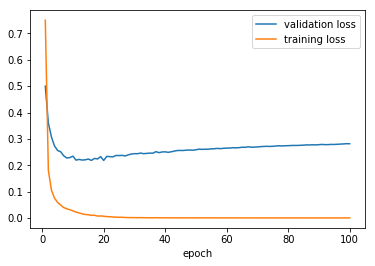

In [6]:
# evaluate training
ix = results['validation loss'].idxmin()
ce_training   = results['training loss'].iloc[ix]
ce_validation = results['validation loss'].iloc[ix]
acc_training   = results['training acc'].iloc[ix]
acc_validation = results['validation acc'].iloc[ix]
print('cross-entropy')
print('        training =',ce_training)
print('      validation =',ce_validation)
print('accuracy rate')
print('        training =',acc_training)
print('      validation =',acc_validation)

ax = results.plot.line(x='epoch',y='validation loss')
results.plot.line(x='epoch',y='training loss',ax=ax)

In [7]:
# check balance and establish a baseline
acc_baseline = (P.sum(axis=0)/P.sum()).max()

# compute test error rate
Ph = model.predict(X)
ix_err = (Ph.argmax(axis=1) != P.argmax(axis=1))
X_err = X[ix_err]
P_err = P[ix_err]
acc_test = 1 - X_err.shape[0]/X.shape[0]
print('    baseline accuracy rate =',acc_baseline)
print('        test accuracy rate =',acc_test)
print('     incorrect predictions =',X_err.shape[0])

    baseline accuracy rate = 0.1115
        test accuracy rate = 0.9909
     incorrect predictions = 91


IndexError: index 91 is out of bounds for axis 0 with size 91

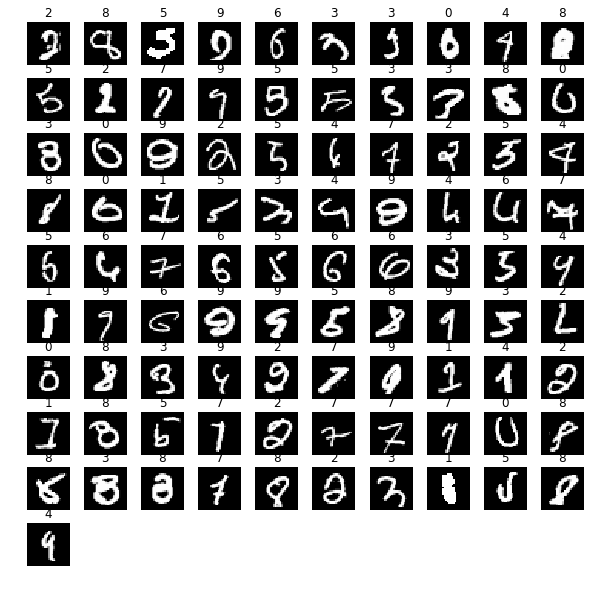

In [8]:
# plot incorrectly classified images
PlotImages(0,95,10,10,X_err,P_err,label_names,color=False)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
p  = P.argmax(axis=1)
ph = Ph.argmax(axis=1)
ConfusionMatrix = confusion_matrix(p,ph)
ConfusionMatrix = pd.DataFrame(ConfusionMatrix,index=label_names,columns=label_names)
ConfusionMatrix['total'] = ConfusionMatrix.sum(axis=1)
ConfusionMatrix

,0,1,2,3,4,5,6,7,8,9,total
0,970,0,0,0,0,1,5,0,0,0,976
1,0,1110,1,2,0,0,0,0,2,0,1115
2,0,1,1009,0,0,1,1,0,4,2,1018
3,0,0,3,1002,0,4,0,1,2,1,1013
4,0,1,0,0,932,0,2,1,0,4,940
5,0,0,1,5,1,904,3,0,3,0,917
6,1,0,0,0,2,2,1003,0,2,0,1010
7,0,2,3,0,3,0,0,1028,1,1,1038
8,2,1,2,2,0,2,0,1,976,2,988
9,2,1,0,0,1,1,0,2,3,975,985


In [12]:
print('conditional probabilities:')
(ConfusionMatrix/ConfusionMatrix['total']).round(3)

conditional probabilities:


,0,1,2,3,4,5,6,7,8,9,total
0,0.994,0.000,0.000,0.000,0.000,0.001,0.005,0.000,0.000,0.000,NaN
1,0.000,0.996,0.001,0.002,0.000,0.000,0.000,0.000,0.002,0.000,NaN
2,0.000,0.001,0.991,0.000,0.000,0.001,0.001,0.000,0.004,0.002,NaN
3,0.000,0.000,0.003,0.989,0.000,0.004,0.000,0.001,0.002,0.001,NaN
4,0.000,0.001,0.000,0.000,0.991,0.000,0.002,0.001,0.000,0.004,NaN
5,0.000,0.000,0.001,0.005,0.001,0.986,0.003,0.000,0.003,0.000,NaN
6,0.001,0.000,0.000,0.000,0.002,0.002,0.993,0.000,0.002,0.000,NaN
7,0.000,0.002,0.003,0.000,0.003,0.000,0.000,0.990,0.001,0.001,NaN
8,0.002,0.001,0.002,0.002,0.000,0.002,0.000,0.001,0.988,0.002,NaN
9,0.002,0.001,0.000,0.000,0.001,0.001,0.000,0.002,0.003,0.990,NaN
